In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
insulin_grped = df.groupby('BloodPressure')['Insulin'].mean().reset_index()

In [6]:
X=df.iloc[:,0:8]
y=df.iloc[:,-1]

<Axes: xlabel='BloodPressure', ylabel='Insulin'>

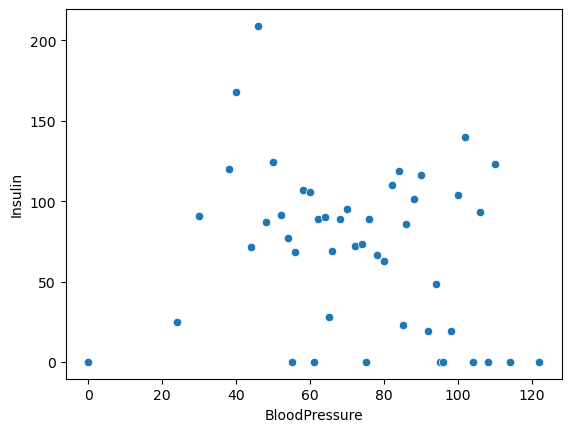

In [7]:
sns.scatterplot(data=insulin_grped,x='BloodPressure',y='Insulin')

In [8]:
df['BMI'] = df['BMI'].astype('int64')

In [9]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype('int64')

In [10]:
df.dtypes

Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                     int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
Outcome                     int64
dtype: object

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.548177,0.071615,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.860602,0.277494,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.000000,0.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000,81.000000,1.000000


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
class MyKNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        # Ensure data is numeric
        self.X_train = np.array(X_train, dtype=float)
        self.y_train = np.array(y_train, dtype=float)

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        X_test = np.array(X_test, dtype=float)  # Ensure test data is numeric
        predictions = []
        for x_test in X_test:
            distances = [self._euclidean_distance(x_test, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

In [23]:
knn = MyKNN()

In [73]:
knn.fit(X_train,y_train)

In [75]:
y_pred = knn.predict(X_test)

In [76]:
class AccuracyCalculator:
    def __init__(self, y_train, y_pred):
        assert len(y_train) == len(y_pred), "Lengths of true labels and predicted labels must be the same."
        self.y_train = y_train
        self.y_pred = y_pred

    def calculate_accuracy(self):
        # Initialize counters for true positives, true negatives, false positives, and false negatives
        TP = TN = FP = FN = 0
        
        # Iterate over the true and predicted labels
        for true, predicted in zip(self.y_train, self.y_pred):
            if true == predicted:
                if true == 1:  # True Positive
                    TP += 1
                else:           # True Negative
                    TN += 1
            else:
                if predicted == 1:  # False Positive
                    FP += 1
                else:                # False Negative
                    FN += 1
        
        # Calculate accuracy
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        return accuracy

In [77]:
acc = AccuracyCalculator(y,y_pred)

AssertionError: Lengths of true labels and predicted labels must be the same.

In [79]:
y.shape

(768,)

In [81]:
y_pred.shape

(231,)

In [83]:
y_pred

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1.

In [71]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test,y_pred)

0.6753246753246753

<h1>Problem 2</h1>

In [88]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [100]:
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [102]:
knn.fit(X_train_s,y_train)

In [104]:
y_pred_s = knn.predict(X_test_s)

In [105]:
y_pred_s

array([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1.

In [108]:
accuracy_score(y_test,y_pred_s)

0.70995670995671